<a href="https://colab.research.google.com/github/vahid-am/AI-Projects/blob/main/Lecture_7_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise:**
Simulating the Deutsch–Jozsa algorithm to determine whether the following function is constant or balanced

$$
f : \{0,1\}^n \to \{0,1\}, \quad
f(x_0, ... , x_2) = \oplus_{i=0}^{n-1} x_i
$$

In [8]:
!pip install qiskit qiskit-aer

q_0: ──■─────────────────
       │                 
q_1: ──┼────■────────────
       │    │            
q_2: ──┼────┼────■───────
       │    │    │       
q_3: ──┼────┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘

┌───┐     ┌─────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0    ├┤ H ├┤M├─────────
     ├───┤     │     │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1    ├┤ H ├─╫─┤M├──────
     ├───┤     │     │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Uf ├┤ H ├─╫──╫─┤M├───
     ├───┤     │     │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3    ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│     │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4    ├──────╫──╫──╫──╫─
     └───┘└───┘└─────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════╩══╩══╩══╩═
                            0  1  2  3

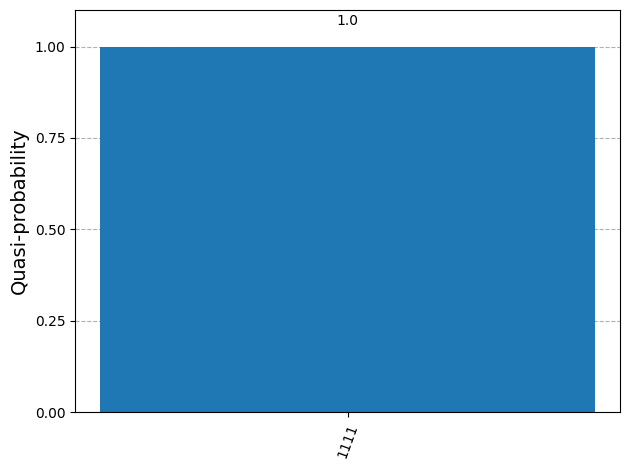

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

n = 4  # Number of input qubits

# ===============================
# Quantum Oracle
# ===============================

def oracle(n):
    qc = QuantumCircuit(n+1, name="Uf")

    for qubit in range(n):
        qc.cx(qubit, n)

    return qc

oracle = oracle(n)
display(oracle.draw())

# ===============================
# Build Deutsch–Jozsa Circuit
# ===============================

def deutsch_jozsa(n, oracle):
    qc = QuantumCircuit(n+1, n)

    # Step 1: Hadamard on input qubits
    for qubit in range(n):
        qc.h(qubit)

    # Step 2: Prepare output qubit in |->
    qc.x(n)
    qc.h(n)

    # Step 3: Apply oracle
    qc.append(oracle, range(n+1))

    # Step 4: Hadamard on input qubits again
    for qubit in range(n):
        qc.h(qubit)

    # Step 5: Measure input qubits
    for qubit in range(n):
        qc.measure(qubit, qubit)

    return qc

# Build circuit
qc = deutsch_jozsa(n, oracle)
display(qc.draw())

# ===============================
# Simulate
# ===============================

simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1024).result()

counts = result.get_counts()

# Convert to probabilities
shots = sum(counts.values())
probs = {k: v / shots for k, v in counts.items()}

plot_histogram(probs)